# TECH CHALLENGE - DATA SCIENTIST

In [ ]:
# lien vers la présentation : https://docs.google.com/presentation/d/1D-r0A3R7yJ8QxMsue05w10iJtMEE5xqh99RtTWe_U-Y/edit?usp=sharing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re

# 1. Analyse descriptive exploratoire (EDA)

#### Tu commenceras par explorer les données de vente, et tu mettras en avant notamment les saisonnalités, les produits et la complétude des données.

In [ ]:
df_ventes = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/test/history.csv')

In [ ]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    520 non-null    object
 1   ITEM    520 non-null    object
 2   SALES   520 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


In [ ]:
# modification du type de données de la colonne 'date'
df_ventes['DATE'] = pd.to_datetime(df_ventes['DATE'], format = "%d-%m-%Y")

In [ ]:
# vérification de la complétude des données
df_ventes.isnull().sum()

DATE     0
ITEM     0
SALES    0
dtype: int64

Text(0.5, 1.0, 'Ventes totales par item')

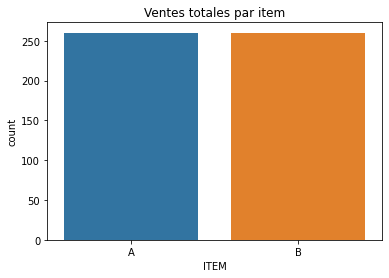

In [ ]:
sns.countplot(data = df_ventes, x = 'ITEM')
plt.title('Ventes totales par item')

In [ ]:
df_ventes.describe()

,SALES
count,520.000000
mean,98.207692
std,61.444707
min,0.000000
25%,48.000000
50%,87.000000
75%,143.000000
max,282.000000


In [ ]:
px.scatter(df_ventes, x = 'DATE', y = 'SALES', color = 'ITEM', title = 'Ventes 2019')

In [ ]:
px.bar(x = df_ventes['DATE'].dt.month, y = df_ventes['SALES'], color = df_ventes['ITEM'], title = 'Ventes mensuelles')

In [ ]:
# Ventes totales et moyennes par mois et par item
pd.pivot_table(df_ventes, values = 'SALES', index = df_ventes['DATE'].dt.month, columns = 'ITEM', aggfunc = ['sum', 'mean'])

sum              mean            
ITEM     A     B           A           B
DATE                                    
1     3095   941  140.681818   42.772727
2     1743  1920   87.150000   96.000000
3     1875  2184   81.521739   94.956522
4     1906  1721   95.300000   86.050000
5     1644  2759   71.478261  119.956522
6     1423  3355   64.681818  152.500000
7      972  3933   46.285714  187.285714
8     1058  4219   46.000000  183.434783
9     1079  3353   51.380952  159.666667
10    1722  2526   78.272727  114.818182
11    3201   774  145.500000   35.181818
12    2467  1198  117.476190   57.047619

# 2. Trouver la boutique correspondante
#### Tu détermineras à quelle boutique correspond ce fichier de ventes. Pour cela, tu pourras t'aider de données météo. En effet, Bernardo nous a indiqué que les ventes sont corrélées à la météo. Les boutiques se situent à Bordeaux, Lille, Lyon et Marseille. Tu trouveras les historiques de météo ici pour Bordeaux, Lille, Lyon, et Marseille.


In [ ]:
bordeaux = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/bordeaux2019.csv'
lille = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/lille2019.csv'
lyon = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/lyon2019.csv'
marseille = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/marseille2019.csv'

In [ ]:
cities = [lyon, lille, bordeaux, marseille]

Dans un but d'automatisation, j'ai créé une fonction qui affiche 3 sous graphiques pour chaque produit et 3 mesures de météo (temp max, quantité de précipitation et couverture nuageuse) pour chaque ville.

Pour ajouter et comparer une nouvelle ville, il conviendra de créer une nouvelle variable au nom de la ville et de lui affecter le nom du .csv; puis d'ajouter cette variable à la liste de villes ci-dessus

In [ ]:
def descr(cities, df):
    
    list_product = df['ITEM'].unique()            # list_product = A & B
    
    for product in list_product:
        dataframe = df[df['ITEM'] == product]           # on isole les ventes propre à chaque produit dans un nouveau dataframe
        fig = make_subplots(rows = 4,cols = 1,        # pour chaque produit,création d'une figure avec 2 sous graphiques
                            specs = [[{"secondary_y": True}], [{"secondary_y": True}], 
                                     [{"secondary_y": True}], [{"secondary_y": True}]])  # chaque sous-graphique a 2 axes y (un primaire (gauche), un secondaire (droite))
        fig.update_layout(title_text="PRODUCT " + product)
       
        
        
        for i in range(4):    
            fig.add_trace(go.Scatter(x = dataframe['DATE'],               # chaque sous-graphique affichera les ventes du produit concerné
                                     y = dataframe["SALES"],
                                     mode = 'markers',
                                     name = 'product ' + product + ' sales'),
                          secondary_y=False,    # l'axe y utilisé est l'axe primaire (gauche)
                          row = i+1, col = 1)
            fig.update_yaxes(title_text="SALES", secondary_y=False, row = i+1)    # mise à jour du nom de l'axe y
        
        for city in cities:
            df_city = pd.read_csv(city, skiprows = 3)
            df_city['DATE'] = pd.to_datetime(df_city['DATE'], format = '%Y-%m-%d')    # pour chaque ville parmi la liste de villes,
                                                                                      # création d'un DF issu du csv et modification du format de la date
            
            fig.add_trace(go.Scatter(x = df_city['DATE'],   # le 1er sous-graphique représente l'évolution de la temp max
                                 y = df_city['MAX_TEMPERATURE_C'], 
                                 name = 'temp max in ' + re.search(r'/test/(.+?)2019\.csv', city).group(1)), 
                          secondary_y=True,                         # l'axe y utilisé est l'axe secondaire (droite)
                          row = 1, col = 1)
            
            fig.add_trace(go.Scatter(x = df_city['DATE'],   # le 2e sous-graphique représente l'évolution des précipitations
                                 y = df_city['PRECIP_TOTAL_DAY_MM'], 
                                 name = 'rain in ' + re.search(r'/test/(.+?)2019\.csv', city).group(1)), 
                          secondary_y=True,                        # l'axe y utilisé est l'axe secondaire (droite)
                          row = 2, col =1)
        
            fig.add_trace(go.Scatter(x = df_city['DATE'],    # le 3e sous-graphique représente la couverture nuageuse tout au long de l'année
                                 y = df_city['CLOUDCOVER_AVG_PERCENT'],
                                 name = 'cloudcover in ' + re.search(r'/test/(.+?)2019\.csv', city).group(1)), 
                          secondary_y=True,
                          row = 3, col =1)
            
            fig.add_trace(go.Scatter(x = df_city['DATE'],    # le 4e sous-graphique représente la vitesse du vent tout au long de l'année
                                     y = df_city['WINDSPEED_MAX_KMH'],
                                     name = 'windspeed in ' + re.search(r'/test/(.+?)2019\.csv', city).group(1)), 
                          secondary_y=True,
                          row = 4, col =1)
            

        fig.update_layout(height=1500, width=1000)
        fig.update_yaxes(title_text="MAX TEMPERATURE", secondary_y=True, row = 1)
        fig.update_yaxes(title_text="PRECIP_TOTAL_DAY_MM", secondary_y=True, row = 2)
        fig.update_yaxes(title_text="CLOUDCOVER_AVG_PERCENT", secondary_y=True, row = 3)
        fig.update_yaxes(title_text="WINDSPEED_MAX_KMH", secondary_y=True, row = 4)
        fig.show()
        
        #px.scatter(df4, x="DATE", y="SALES", color = 'OPINION', facet_col="ITEM").show()


In [ ]:
descr(cities, df_ventes)

Si on regarde les 4 graphiques pour chaque produit, on peut constater que les écarts entre les villes sont assez faibles.
Néanmoins, la météo de Bordeaux semble plus corrélée aux ventes que les autres villes

# 3. Explication de l'impact de la météo
#### Tu détermineras (par corrélation, ou par Machine Learning) l'importance de chaque dimension. Tu mettras en avant les variables (température, vitesse du vent, etc...) qui semblent les plus corrélées aux ventes, et celles qui sont le moins corrélées. Bernardo a-t-il raison : est-ce bien le vent qui a le plus d'impact sur les ventes ?

#### Concentrons nous donc sur le fichier de météo de Bordeaux

In [ ]:
# création du DF final : ventes + météo bordeaux

df_bordeaux = pd.read_csv(bordeaux, skiprows = 3)
df_bordeaux['DATE'] = pd.to_datetime(df_bordeaux['DATE'], format = '%Y-%m-%d')

df_final = pd.merge(df_ventes, df_bordeaux, on = 'DATE', how = 'left')
df_final.head()

,DATE,ITEM,SALES,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2019-01-02,A,113,9,4,14,5,7,6,0.0,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
1,2019-01-03,A,143,7,2,15,1,5,5,0.0,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable
2,2019-01-04,A,145,7,1,13,0,5,5,0.0,...,7,0,-3,113,116,122,0,1,5.1,météo très défavorable
3,2019-01-05,A,167,6,1,9,0,4,4,0.0,...,6,0,-1,116,116,116,0,1,8.7,météo très défavorable
4,2019-01-06,A,202,5,0,10,-1,4,3,0.0,...,5,0,-2,143,116,116,0,1,8.7,météo très défavorable


In [ ]:
for i in df_final['ITEM'].unique():
  print("PRODUCT " + i)
  print(df_final[df_final['ITEM'] == i].corr()['SALES'].sort_values())
  print("")

PRODUCT A
MAX_TEMPERATURE_C        -0.746737
HEATINDEX_MAX_C          -0.746466
TEMPERATURE_EVENING_C    -0.730641
TEMPERATURE_NOON_C       -0.726730
SUNHOUR                  -0.717943
WINDTEMP_MAX_C           -0.664779
MIN_TEMPERATURE_C        -0.635047
TEMPERATURE_MORNING_C    -0.491502
DEWPOINT_MAX_C           -0.471143
UV_INDEX                 -0.402487
PRESSURE_MAX_MB          -0.353709
VISIBILITY_AVG_KM        -0.221306
WINDSPEED_MAX_KMH         0.395555
WEATHER_CODE_MORNING      0.500543
WEATHER_CODE_NOON         0.596221
WEATHER_CODE_EVENING      0.606529
HUMIDITY_MAX_PERCENT      0.620117
CLOUDCOVER_AVG_PERCENT    0.657997
PRECIP_TOTAL_DAY_MM       0.741453
SALES                     1.000000
TOTAL_SNOW_MM                  NaN
Name: SALES, dtype: float64

PRODUCT B
CLOUDCOVER_AVG_PERCENT   -0.687408
HUMIDITY_MAX_PERCENT     -0.663429
PRECIP_TOTAL_DAY_MM      -0.625089
WEATHER_CODE_EVENING     -0.609637
WEATHER_CODE_NOON        -0.575278
WEATHER_CODE_MORNING     -0.489195
WINDSP

Pour les ventes du produit A, les features les + corrélées négativement sont relatives aux températures élevées (max_temp, heatindex, sunhour), tandis que les features corrélées positivement sont relatives à un temps pluvieux (humidity, cloudcover, precipitations)

Pour les ventes du produit B, c'est l'inverse, les corrélations positives sont relatives aux températures élevées, alors que les corrélations négatives sont relatives à un temps pluvieux

Bernardo a donc tort, ce n'est pas le vent qui a le plus d'influence sur les ventes

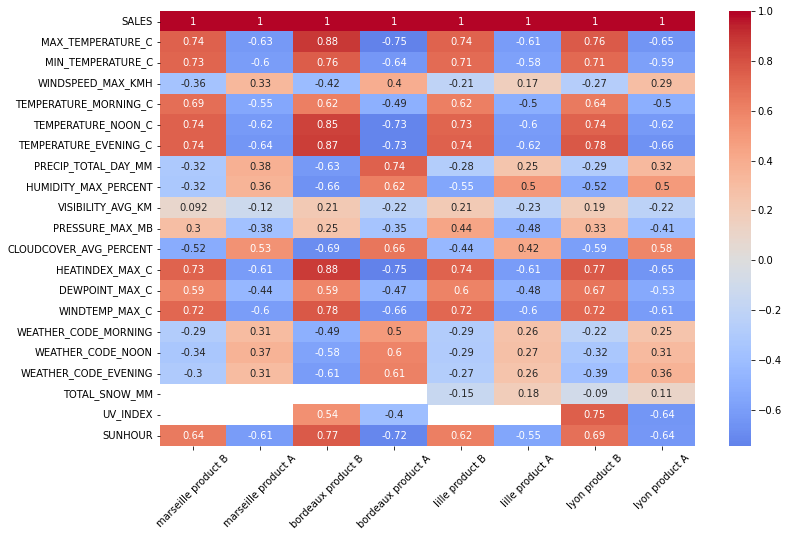

In [ ]:
# nous pouvons vérifier le diagnostic de la question 2 avec les coefficients de corrélation pour chaque produit et chaque ville

list_product = df_ventes['ITEM'].unique()

def correlation(cities):
    df_corr = pd.DataFrame()
    for city in cities:
        df_city = pd.read_csv(city, skiprows = 3)
        df_city['DATE'] = pd.to_datetime(df_city['DATE'], format = '%Y-%m-%d')
        df_city = df_ventes.merge(df_city, how = 'left', on = 'DATE')
        for product in list_product:
            df_corr = pd.concat([pd.DataFrame(df_city[df_city['ITEM']==product].corr()['SALES']), df_corr], axis = 1)
            df_corr.rename(columns={"SALES": ((re.search(r'/test/(.+?)2019\.csv', city).group(1)) + ' product ' + product)}, 
                           inplace = True)
    plt.figure(figsize = (12,8))
    fig = sns.heatmap(df_corr, center = 0, cmap = 'coolwarm', annot = True)
    plt.xticks(rotation = 45)  
    return fig


correlation(cities)

## Bordeaux a bien les coefficients de corrélation les plus forts comparativement aux autres villes

# 4. Prévisions de ventes
Bernardo a récupéré des prévisions météo sur une semaine (le fichier est ici). Il aimerait que tu lui fasses une prévision des ventes correspondant à cette période, pour qu'il puisse acheter les bons stocks de produit. Tu devras donc indiquer le stock total minimum que tu conseilles à Bernardo de commander pour la semaine prochaine, afin de pouvoir répondre à la demande, sans faire des sur-stocks.

https://raw.githubusercontent.com/murpi/wilddata/master/test/forecast.csv

In [ ]:
météo = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/forecast.csv'

In [ ]:
df_meteo = pd.read_csv(météo)
df_meteo

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
0,2021-06-21,20,14,23,2.0,92,7.0,1025,61.0
1,2021-06-22,25,17,10,0.0,73,9.0,1027,26.0
2,2021-06-23,25,18,19,0.0,79,10.0,1024,19.0
3,2021-06-24,32,23,12,0.0,76,10.0,1018,2.0
4,2021-06-25,28,20,13,1.0,82,10.0,1015,36.0
5,2021-06-26,20,16,19,0.0,88,9.0,1013,89.0
6,2021-06-27,21,15,31,1.0,89,9.0,1015,76.0


In [ ]:
# création d'un DF final propre pour le machine learning
# celui-ci est issu du DF météo de la ville de Bordeaux duquel je ne garde que les colonnes communes au DF météo

df_ML = df_final[['MAX_TEMPERATURE_C',	'MIN_TEMPERATURE_C',	
                     'WINDSPEED_MAX_KMH',	'PRECIP_TOTAL_DAY_MM',	
                     'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM',	
                     'PRESSURE_MAX_MB',	'CLOUDCOVER_AVG_PERCENT']]

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAX_TEMPERATURE_C       520 non-null    int64  
 1   MIN_TEMPERATURE_C       520 non-null    int64  
 2   WINDSPEED_MAX_KMH       520 non-null    int64  
 3   PRECIP_TOTAL_DAY_MM     520 non-null    float64
 4   HUMIDITY_MAX_PERCENT    520 non-null    int64  
 5   VISIBILITY_AVG_KM       520 non-null    float64
 6   PRESSURE_MAX_MB         520 non-null    int64  
 7   CLOUDCOVER_AVG_PERCENT  520 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 36.6 KB


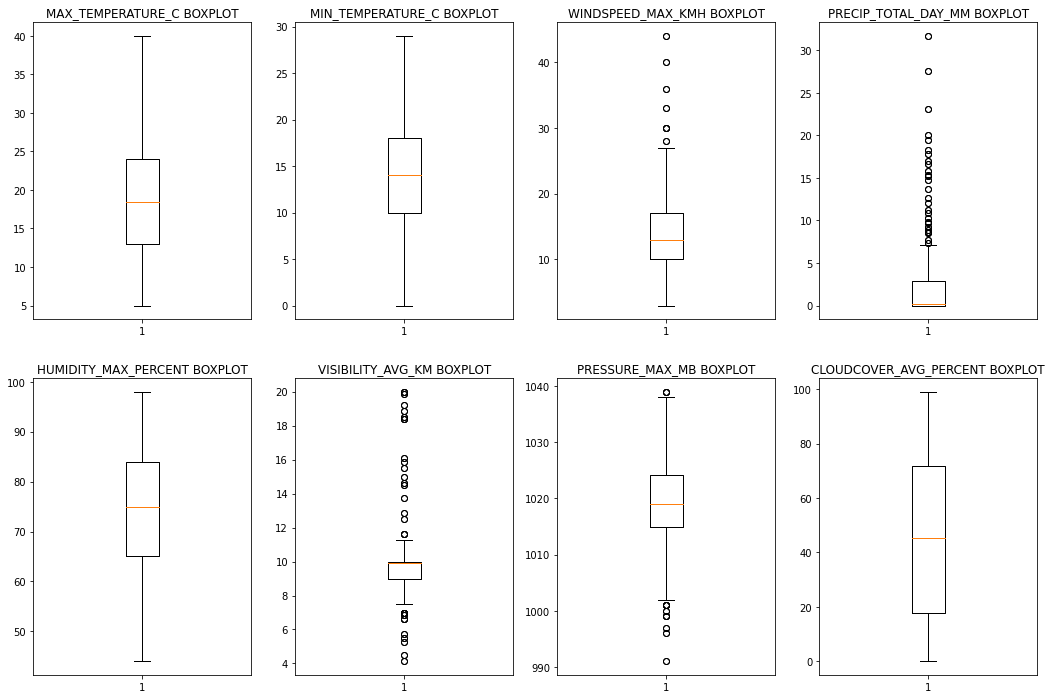

In [ ]:
# voyons voir les boxplot des features du DF ML

plt.figure(figsize=(18,12))
for i in range(len(df_ML.columns)):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(x = df_ML[df_ML.columns[i]])
    plt.title(df_ML.columns[i] + ' BOXPLOT')

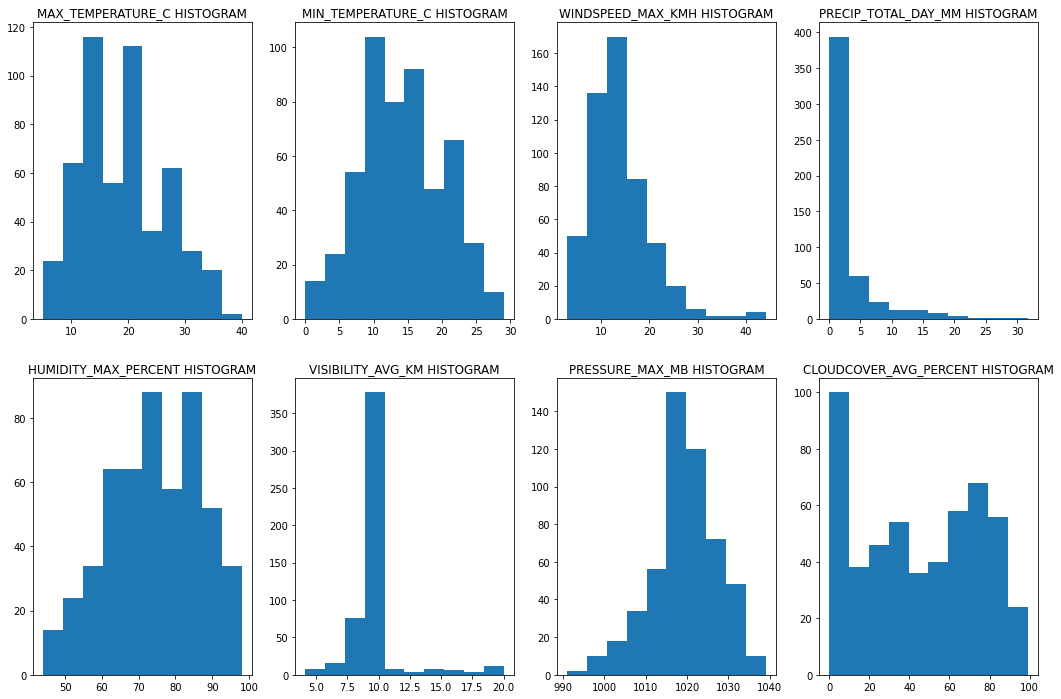

In [ ]:
# ainsi que la distribution des valeurs de chaque feature

plt.figure(figsize=(18,12))
for i in range(len(df_ML.columns)):
    plt.subplot(2, 4, i + 1)
    plt.hist(x = df_ML[df_ML.columns[i]])
    plt.title(df_ML.columns[i] + ' HISTOGRAM')

In [ ]:
# ces graphiques permettent d'identifier la présence ou non d'outliers
# en effet, selon la présence ou l'absence d'outliers, le preprocessing sera différent

no_outliers = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'CLOUDCOVER_AVG_PERCENT']
outliers = ['WINDSPEED_MAX_KMH', 'PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB']

In [ ]:
# Scaling des données
# les colonnes comportant des outliers seront scalées grâce au RobustScaler
# tandis que les colonnes sans outliers seront scalées grâce au StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('ss', StandardScaler(), no_outliers),
                                       ('rs', RobustScaler(), outliers)],
                       remainder = 'passthrough')

X_scaled = ct.fit_transform(df_ML)
X_meteo = ct.fit_transform(df_meteo.drop(columns = ['DATE']))
df_ML = pd.concat([pd.DataFrame(X_scaled, columns = no_outliers + outliers), df_final[['ITEM', 'SALES']]], axis =1)

df_ML

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,HUMIDITY_MAX_PERCENT,CLOUDCOVER_AVG_PERCENT,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,ITEM,SALES
0,-1.366401,-1.655009,1.424574,-0.587092,0.142857,-0.070175,-0.9375,2.054054,A,113
1,-1.640949,-1.981490,-0.187216,-0.768135,0.285714,-0.070175,0.0625,1.945946,A,143
2,-1.640949,-2.144730,-0.751342,-0.065017,0.000000,-0.070175,0.0625,1.945946,A,145
3,-1.778222,-2.144730,0.538090,-1.201795,-0.571429,-0.070175,0.0625,2.162162,A,167
4,-1.915496,-2.307971,1.343985,-0.406050,-0.428571,-0.070175,-1.9375,2.162162,A,202
...,...,...,...,...,...,...,...,...,...,...
515,-0.817306,-0.512324,1.666342,-0.182905,-0.428571,-0.070175,-4.4375,0.756757,B,96
516,-0.817306,-0.512324,0.860448,0.398115,0.142857,0.070175,-0.0625,1.297297,B,85
517,-0.817306,-0.838806,1.505164,-0.856551,-0.857143,-0.070175,-0.9375,1.513514,B,87
518,-1.229128,-1.165287,1.263395,-0.111330,-0.428571,-0.070175,-2.9375,1.513514,B,79


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

for product in list_product:
  X = df_ML[df_ML['ITEM'] == product].drop(columns = ['ITEM', 'SALES'])
  y = df_ML[df_ML['ITEM'] == product]['SALES']

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

  modelLR = LinearRegression()
  modelLR.fit(X_train, y_train)

  r = permutation_importance(modelLR, X_train, y_train)

  print('Product ' + product + ' LR train score ', modelLR.score(X_train, y_train))
  print('Product ' + product + ' LR test score ',modelLR.score(X_test, y_test))
  print()
  print('Predictions for product ' + product)
  print(pd.DataFrame(modelLR.predict(X_meteo).round(0), index = df_meteo['DATE'], columns = [product]))
  print()
  print(pd.DataFrame(r.get('importances_mean'), 
                     index = X.columns, 
                     columns = ['importance_mean'])\
        .sort_values(by = 'importance_mean', ascending = False))
  print()

Product A LR train score  0.8772060231293278
Product A LR test score  0.823961084015961

Predictions for product A
                A
DATE             
2021-06-21  138.0
2021-06-22   64.0
2021-06-23   62.0
2021-06-24   15.0
2021-06-25   64.0
2021-06-26  104.0
2021-06-27  118.0

                        importance_mean
PRECIP_TOTAL_DAY_MM            0.594478
MAX_TEMPERATURE_C              0.249228
MIN_TEMPERATURE_C              0.038758
CLOUDCOVER_AVG_PERCENT         0.012612
PRESSURE_MAX_MB                0.002711
WINDSPEED_MAX_KMH              0.000491
VISIBILITY_AVG_KM              0.000446
HUMIDITY_MAX_PERCENT           0.000003



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Product B LR train score  0.9436588944421019
Product B LR test score  0.9163943653746203

Predictions for product B
                B
DATE             
2021-06-21   35.0
2021-06-22  139.0
2021-06-23  137.0
2021-06-24  225.0
2021-06-25  154.0
2021-06-26   62.0
2021-06-27   55.0

                        importance_mean
MAX_TEMPERATURE_C              0.983010
PRECIP_TOTAL_DAY_MM            0.248954
CLOUDCOVER_AVG_PERCENT         0.016972
WINDSPEED_MAX_KMH              0.005355
MIN_TEMPERATURE_C              0.001697
HUMIDITY_MAX_PERCENT           0.000261
PRESSURE_MAX_MB                0.000062
VISIBILITY_AVG_KM              0.000021



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# pour chaque produit, les scores d'entraînement et de test sont très proches : il n'y a pas d'over ou d'under fitting
# les scores sont également élevés, ce qui rend les prédictions fiables
# on remarque également que les features 'PRECIP_TOTAL_DAY_MM' et 'MAX_TEMPERATURE_C' sont celles qui ont un plus grand impact sur le score de l'algorithme
# Bernardo devra en tenir compte pour ses stocks : si des records de chaleur sont prévus, les ventes du produit B seront fortes
# et si la pluie est annoncée, les ventes du produit A seront accrues

In [ ]:
# Mesurons la marge d'erreur sur nos prédictions

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

y_pred = modelLR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('RMSE =', round(rmse, 0)) # racine de la moyenne des écarts au carré entre les valeurs réelles y et les valeurs prédites y_pred
print('MAE =', round(mae, 0))
# les 2 résultats sont interprétables dans l'unité de la target

RMSE = 20.0
MAE = 13.0
